In [1]:
import netCDF4 as nc
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt

In [2]:
data = nc.Dataset("./mcam_dataset.nc")
data.variables.keys()

dict_keys(['__sys_version__', '__owl_sys_info__', '__owl_version__', 'image_y', 'image_x', 'y', 'x', '__falcon.build_info.version__', '__falcon.build_info.configuration__', '__falcon.build_info.branch__', '__falcon.sensor_board.serial_number__', '__falcon.dna__', 'sensor_chroma', 'sensor_board', 'micro_camera_separation', 'external_illumination_brightness', 'N_cameras_Y', 'N_cameras_X', 'N_cameras_physical_Y', 'N_cameras_physical_X', 'bayer_pattern', 'latest_acquisition_index', 'illumination_brightness', 'exif_orientation', 'acquisition_count', 'exposure', 'digital_red_gain', 'digital_green1_gain', 'digital_blue_gain', 'digital_green2_gain', 'analog_gain', 'digital_gain', 'frame_rate_setpoint', 'start_pixel_x', 'start_pixel_y', 'end_pixel_x', 'end_pixel_y', 'acquisition_index', 'virtual_selection', 'local_timezone', 'software_timestamp', 'software_timestamp_timezone', '__z_stage.stage_serial_number__', '__z_stage.ftdi_serial_number__', '__z_stage.flipped__', '__z_stage.travel_range__',

In [3]:
cam = data.variables["images"]
cam.shape

(11, 8, 6, 3072, 3072)

In [4]:
x, y = 3, 4
stack = cam[:, x, y]
stack.shape

(11, 3072, 3072)

In [5]:
min_stack = np.min(stack, axis=0)/255
max_stack = np.max(stack, axis=0)/255

In [6]:
product = min_stack*max_stack

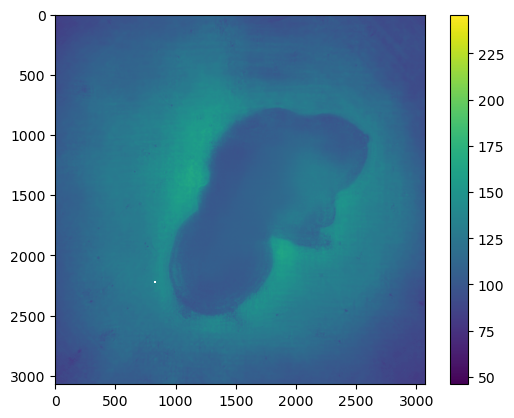

In [7]:
plt.imshow((product*255).astype(np.uint8))
plt.colorbar()

In [8]:
from skimage.io import imsave
imsave("cam{}_{}max_stack.png".format(x,y), (max_stack*255).astype(np.uint8))
imsave("product_stack{}_{}.png".format(x,y), (product*255).astype(np.uint8))

/home/isildur7/miniconda3/envs/cudanpy/lib/python3.10/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
